# Amazon Top 50 books (2009-2019)

#### Over the years e- commerce has taken over the world and big players such as Amazon, Flipkart, ebay, etc. have gained enourmous amount of consumers.
#### I have taken this dataset from kaggle to explore and provide various insights using CRISP- DM approach 

Some of the questions that I'll be addressing:
1. Are there any correlations between the variables?
2. Popularity of genres by year
3. Top Authors of Best Selling books
4. Price comparison between Fiction and Non Fiction books.
5. Does price Price tend to drop over years?

#### Further, I'll also build a recommendation system that would suggest similar books based on choice

Skip over to results to view the findings
[Results](#section_1)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
data = pd.read_csv('C:\\Users\\JohnVinodhA\\Downloads\\datascience\\bestsellers with categories.csv')
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [59]:
data['Description']=np.load('C:\\Users\\JohnVinodhA\\Downloads\\Book_description.npy')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,Description
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.5/5 · Barnes & Noble\n4.8/5 · Walmart\n4.7/5...
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,11/22/63 is a novel by Stephen King about a ti...
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,3.9/5 · Goodreads\n4.9/5 · Barnes & Noble\n1/4...
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,"Written more than 70 years ago, 1984 was Georg..."
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,"Presenting the next must-have, fun-filled gift..."


# Checking for Null Values

In [60]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Description    0
dtype: int64

# Exploratory Data Analysis (EDA)

**Distribution of Classes**

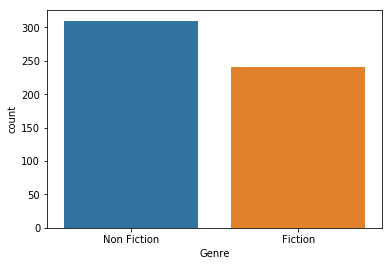

In [5]:
sns.countplot('Genre',data=data)

**Correlation Matrix**

In [6]:
corr = data.corr()
corr

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


<a id='q1'> </a>

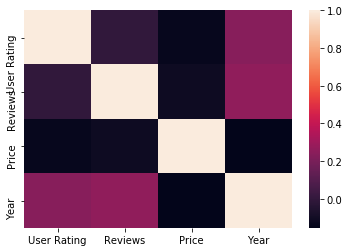

In [7]:
sns.heatmap(corr)

**Scatter Plot of Price and Reviews (For Fiction and Non-Fiction Books)**

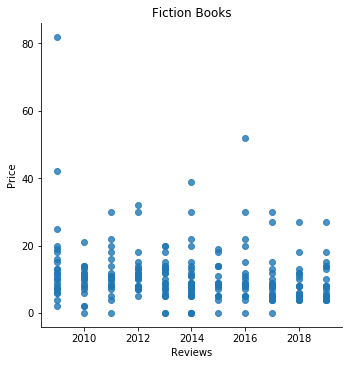

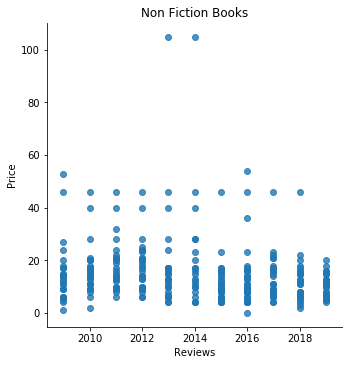

In [58]:
for genre in ['Fiction','Non Fiction']:
    temp_fiction = data[data['Genre']==genre]
    sns.lmplot(x='Year',y='Price',data=temp_fiction, fit_reg=False)
    plt.title('{} Books'.format(genre))
    plt.xlabel('Reviews')
    plt.ylabel('Price')
    plt.show()

**Average Rating of BestSeller Books (For Fiction and Non-Fiction Books)**

In [10]:
temp = data[data['Genre']=='Fiction']
years =  sorted(temp['Year'].unique().tolist())
mean_rating = pd.DataFrame([], columns=['Year','Rating','Genre'])
for index, year in enumerate(years):
    
    fn_temp = data[(data['Genre']=='Fiction') & (data['Year'] == year)]
    fn_rating = fn_temp['User Rating'].mean()
    nfn_temp = data[(data['Genre'] == 'Non Fiction') & (data['Year'] == year)]
    nfn_rating = nfn_temp['User Rating'].mean()
    temp_fn = {'Year':year,'Rating':fn_rating,'Genre':'Fiction'}
    temp_nfn = {'Year':year, 'Rating':nfn_rating,'Genre':'Non_Fiction'}
    mean_rating = mean_rating.append(temp_fn, ignore_index = True)
    mean_rating = mean_rating.append(temp_nfn, ignore_index = True)
mean_rating

,Year,Rating,Genre
0,2009,4.591667,Fiction
1,2009,4.576923,Non_Fiction
2,2010,4.615000,Fiction
3,2010,4.520000,Non_Fiction
4,2011,4.619048,Fiction
5,2011,4.513793,Non_Fiction
6,2012,4.495238,Fiction
7,2012,4.558621,Non_Fiction
8,2013,4.545833,Fiction
9,2013,4.561538,Non_Fiction


Top 10 Author with Books of Maximum Price

In [12]:
author_price = pd.DataFrame([],columns=['Author','Mean Price'])
authors = data['Author'].unique()
for index, author in enumerate(authors):
    author_data = data[data['Author']==author]
    mean_price = author_data['Price'].mean()
    author_price.loc[index] = [author,mean_price]
author_price =  author_price.sort_values('Mean Price', ascending=False).iloc[:10,:]
author_price

,Author,Mean Price
49,American Psychiatric Association,105.000000
83,Lin-Manuel Miranda,54.000000
168,Bill Simmons,53.000000
139,American Psychological Association,46.000000
232,Alan Moore,42.000000
203,The College Board,39.333333
162,Paulo Coelho,39.000000
85,J. K. Rowling,35.000000
10,Jaycee Dugard,32.000000
36,Thomas Piketty,28.000000


Text(0.5,1,'Authors with Books of Maximum Price')

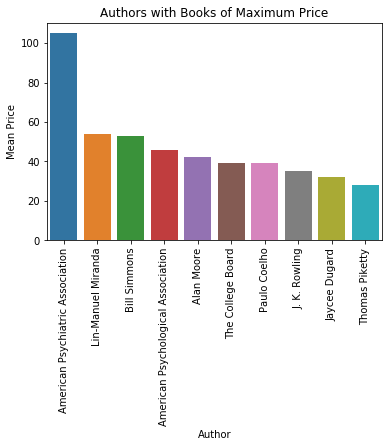

In [13]:
sns.barplot(x = 'Author', y ='Mean Price',data= author_price)
plt.xticks(rotation=90)
plt.title('Authors with Books of Maximum Price')

**Histogram of Reviews and Price**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


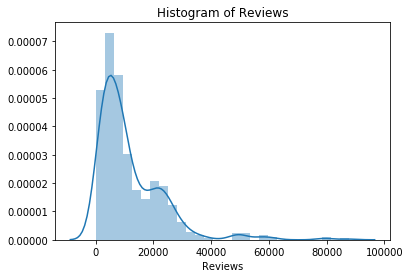

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


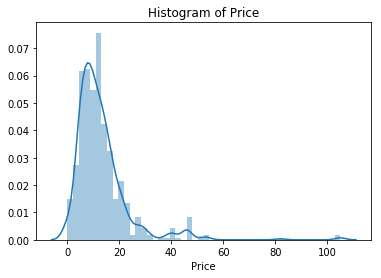

In [14]:
for feature in ['Reviews','Price']:
    sns.distplot(data[feature])
    plt.title('Histogram of {}'.format(feature))
    plt.show()

<a id='q3'></a>

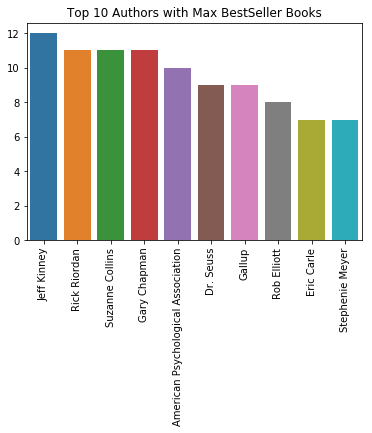

In [15]:
sns.barplot(x = data['Author'].value_counts().head(10).index,y = data['Author'].value_counts().head(10).values,data=data)
plt.xticks(rotation=90)
plt.title('Top 10 Authors with Max BestSeller Books')
plt.show()

**Top 10 Authors with Max BestSeller Books**

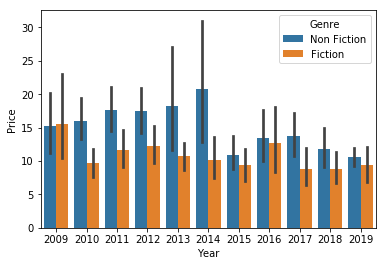

In [80]:
sns.barplot(x=data['Year'],y=data['Price'],hue=data['Genre']) 

<a id='q2'></a>

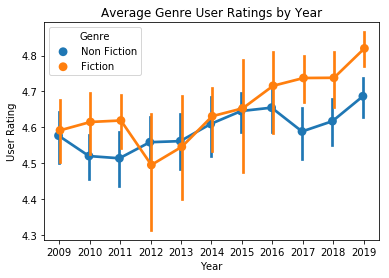

In [76]:
plt.title("Average Genre User Ratings by Year") 
g = sns.pointplot(x="Year", y="User Rating", hue="Genre",
                   data=data, dodge=True)

<a id='q4'> </a>

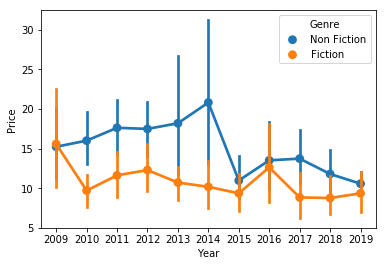

In [121]:
#plt.plot(data.groupby('Year').mean()['Year'],data.groupby('Year').mean()['Price'])
data.groupby('Year').mean()['Price']
sns.pointplot(x="Year", y="Price",hue='Genre',
                   data=data)

<a id='section_1'></a>

# Findings

1. Are there any correlations between the variables?


*No there aren't any correlations between the variables and are independent of each other* [View](#q1)
2. Popularity of genres by year

*Between 2009-11 Fiction has more rating* [View](#q2)
*Between 20012-13 Non Fiction has more rating*
*From 2014, Non Fiction has more rating*

3. Top Authors of Best Selling books

*Jeff Kinney, Rick Riordan, Suzzane Collins and Gary Chapman are the top four authors of best selling books* [View](#q3)
4. Price comparison between Fiction and Non Fiction books.

*Non fiction books are comparatively more pricier than fiction books.* [View](#q4)

5. Does price Price tend to drop over years?

*Though there is minor fluctuations, the trend seems to drop down*

# Recommendation System

##### A Recommender System refers to a system that is capable of predicting the future preference of a set of items for a user, and recommend the top items. One key reason why we need a recommender system in modern society is that people have too much options to use from due to the prevalence of Internet.

In [61]:
# Filling all the empty/nan description rows with empty string
data['Description']=data['Description'].fillna('')

In [46]:
# This function is to remove stopwords from a particular column and to tokenize it
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [48]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
rem_stopwords_tokenize(data,'Description')

In [49]:
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [50]:
lemmatize_all(data,'Description')

In [51]:
def set_rec_finder(na,number):
    def intersection(lst1, lst2): 
        return list(set(lst1) & set(lst2)) 
    def find_rec(name):
        x=list(data[data['Name']==name]['Description'].values)[0]
        score=[]
        for i in range(len(data)):
            score.append([len(intersection(x,data['Description'].values[i])),data['Name'].values[i]])
        return score
    recommendations=find_rec(na)
    recommendations.sort(reverse=True)
    recommendations=np.array(recommendations)
    ans=recommendations[:number,1]
    for i in ans:
        print(i)

In [54]:
set_rec_finder('Diary of a Wimpy Kid: Hard Luck, Book 8',10)

Diary of a Wimpy Kid: Hard Luck, Book 8
The Meltdown (Diary of a Wimpy Kid Book 13)
The Ugly Truth (Diary of a Wimpy Kid, Book 5)
The Third Wheel (Diary of a Wimpy Kid, Book 7)
Wrecking Ball (Diary of a Wimpy Kid Book 14)
Diary of a Wimpy Kid: The Last Straw (Book 3)
Twilight (The Twilight Saga, Book 1)
To Kill a Mockingbird
To Kill a Mockingbird
To Kill a Mockingbird


### *As you can see form the list, the recommender suggests similar books based on the description and this can be used to help readers assist with their next choice of read.*